In [1]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization


In [2]:
from qiskit import qpy
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [3]:
from src.step_1 import build_ansatz, get_backend

In [4]:
num_vars = 109
instance = 'vanguard/internal/default'

outputs = []
for device in ['ibm_marrakesh']:
    backend = get_backend(device, instance, num_vars)
    for ansatz in ['bfcdR']:
        for reps in [1,2,3]:
            ansatz_params = {'entanglement': 'bilinear', 'reps':reps}
            ansatz_, _ = build_ansatz(ansatz, ansatz_params, num_vars, backend)

            # step_2 CIRCUIT OPTIMIZATION
            for trial in range(10):
                print(device, ansatz, reps, trial)
                out_path = f'{ROOT}/data/transpilation/{ansatz_params["entanglement"]}/{num_vars}_pm_{device}_{ansatz}_{reps}_{trial}.qpy'
                if Path(out_path).is_file():
                    with open(out_path, 'br') as f:
                        isa_ansatz = qpy.load(f)[0]
                else:
                    isa_ansatz = generate_preset_pass_manager(target=backend.target, optimization_level=3).run(ansatz_)
                    with open(out_path, 'bw') as f:
                        qpy.dump(isa_ansatz, f)
                outputs.append({'ansatz': ansatz, 'reps': reps, 'device': device, 'trial': trial,
                                'depth': isa_ansatz.depth(),
                                '2q-depth': isa_ansatz.depth(lambda x:x.operation.num_qubits==2),
                                'count_ops': isa_ansatz.count_ops()
                                })

ibm_marrakesh bfcdR 1 0
ibm_marrakesh bfcdR 1 1
ibm_marrakesh bfcdR 1 2
ibm_marrakesh bfcdR 1 3
ibm_marrakesh bfcdR 1 4
ibm_marrakesh bfcdR 1 5
ibm_marrakesh bfcdR 1 6
ibm_marrakesh bfcdR 1 7
ibm_marrakesh bfcdR 1 8
ibm_marrakesh bfcdR 1 9
ibm_marrakesh bfcdR 2 0
ibm_marrakesh bfcdR 2 1
ibm_marrakesh bfcdR 2 2
ibm_marrakesh bfcdR 2 3
ibm_marrakesh bfcdR 2 4
ibm_marrakesh bfcdR 2 5
ibm_marrakesh bfcdR 2 6
ibm_marrakesh bfcdR 2 7
ibm_marrakesh bfcdR 2 8
ibm_marrakesh bfcdR 2 9
ibm_marrakesh bfcdR 3 0
ibm_marrakesh bfcdR 3 1
ibm_marrakesh bfcdR 3 2
ibm_marrakesh bfcdR 3 3
ibm_marrakesh bfcdR 3 4
ibm_marrakesh bfcdR 3 5
ibm_marrakesh bfcdR 3 6
ibm_marrakesh bfcdR 3 7
ibm_marrakesh bfcdR 3 8
ibm_marrakesh bfcdR 3 9


In [5]:
import pandas as pd

df_passmanager = pd.DataFrame(outputs)
df_passmanager.to_excel(f'{ROOT}/data/transpilation/109bilin.xlsx')
df_passmanager

,ansatz,reps,device,trial,depth,2q-depth,count_ops
0,bfcdR,1,ibm_marrakesh,0,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
1,bfcdR,1,ibm_marrakesh,1,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
2,bfcdR,1,ibm_marrakesh,2,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
3,bfcdR,1,ibm_marrakesh,3,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
4,bfcdR,1,ibm_marrakesh,4,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
5,bfcdR,1,ibm_marrakesh,5,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
6,bfcdR,1,ibm_marrakesh,6,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
7,bfcdR,1,ibm_marrakesh,7,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
8,bfcdR,1,ibm_marrakesh,8,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."
9,bfcdR,1,ibm_marrakesh,9,30,6,"{'sx': 973, 'rz': 867, 'cz': 324, 'measure': 1..."


In [6]:
from qiskit_ibm_transpiler.transpiler_service import TranspilerService

outputs = []
for device in ['ibm_marrakesh']:
    backend = get_backend(device, instance, num_vars)
    cloud_transpiler_service = TranspilerService(
        backend_name=device,
        ai=True,
        optimization_level=3,
    )
    for ansatz in ['bfcdR']:
        for reps in [1,2,3]:
            ansatz_params = {'entanglement': 'bilinear', 'reps':reps}
            ansatz_, _ = build_ansatz(ansatz, ansatz_params, num_vars, backend)

            # step_2 CIRCUIT OPTIMIZATION
            for trial in range(10):
                print(device, ansatz, reps, trial)
                out_path = f'{ROOT}/data/transpilation/{ansatz_params["entanglement"]}/{num_vars}_ai_{device}_{ansatz}_{reps}_{trial}.qpy'
                if Path(out_path).is_file():
                    with open(out_path, 'br') as f:
                        isa_ansatz = qpy.load(f)[0]
                else:
                    isa_ansatz = cloud_transpiler_service.run(ansatz_)
                    with open(out_path, 'bw') as f:
                        qpy.dump(isa_ansatz, f)
                outputs.append({'ansatz': ansatz, 'reps': reps, 'device': device, 'trial': trial,
                                'depth': isa_ansatz.depth(),
                                '2q-depth': isa_ansatz.depth(lambda x:x.operation.num_qubits==2),
                                'count_ops': isa_ansatz.count_ops()
                                })


ibm_marrakesh bfcdR 1 0


/Users/gabrieleagliardi/miniforge3/envs/qk1.3/lib/python3.10/site-packages/qiskit/qpy/interface.py:346: UserWarning: The qiskit version used to generate the provided QPY file, 2.0.0, is newer than the current qiskit version 1.4.2. This may result in an error if the QPY file uses instructions not present in this current qiskit version
  warnings.warn(


ibm_marrakesh bfcdR 1 1
ibm_marrakesh bfcdR 1 2
ibm_marrakesh bfcdR 1 3
ibm_marrakesh bfcdR 1 4
ibm_marrakesh bfcdR 1 5
ibm_marrakesh bfcdR 1 6
ibm_marrakesh bfcdR 1 7
ibm_marrakesh bfcdR 1 8
ibm_marrakesh bfcdR 1 9
ibm_marrakesh bfcdR 2 0
ibm_marrakesh bfcdR 2 1
ibm_marrakesh bfcdR 2 2
ibm_marrakesh bfcdR 2 3
ibm_marrakesh bfcdR 2 4
ibm_marrakesh bfcdR 2 5
ibm_marrakesh bfcdR 2 6
ibm_marrakesh bfcdR 2 7
ibm_marrakesh bfcdR 2 8
ibm_marrakesh bfcdR 2 9
ibm_marrakesh bfcdR 3 0
ibm_marrakesh bfcdR 3 1
ibm_marrakesh bfcdR 3 2
ibm_marrakesh bfcdR 3 3
ibm_marrakesh bfcdR 3 4
ibm_marrakesh bfcdR 3 5
ibm_marrakesh bfcdR 3 6
ibm_marrakesh bfcdR 3 7
ibm_marrakesh bfcdR 3 8
ibm_marrakesh bfcdR 3 9


In [7]:
df_ai = pd.DataFrame(outputs)
df_ai

,ansatz,reps,device,trial,depth,2q-depth,count_ops
0,bfcdR,1,ibm_marrakesh,0,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
1,bfcdR,1,ibm_marrakesh,1,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
2,bfcdR,1,ibm_marrakesh,2,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
3,bfcdR,1,ibm_marrakesh,3,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
4,bfcdR,1,ibm_marrakesh,4,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
5,bfcdR,1,ibm_marrakesh,5,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
6,bfcdR,1,ibm_marrakesh,6,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
7,bfcdR,1,ibm_marrakesh,7,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
8,bfcdR,1,ibm_marrakesh,8,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."
9,bfcdR,1,ibm_marrakesh,9,191,42,"{'rz': 1226, 'sx': 924, 'cz': 423, 'measure': ..."


<Axes: xlabel='2q-ops', ylabel='x'>

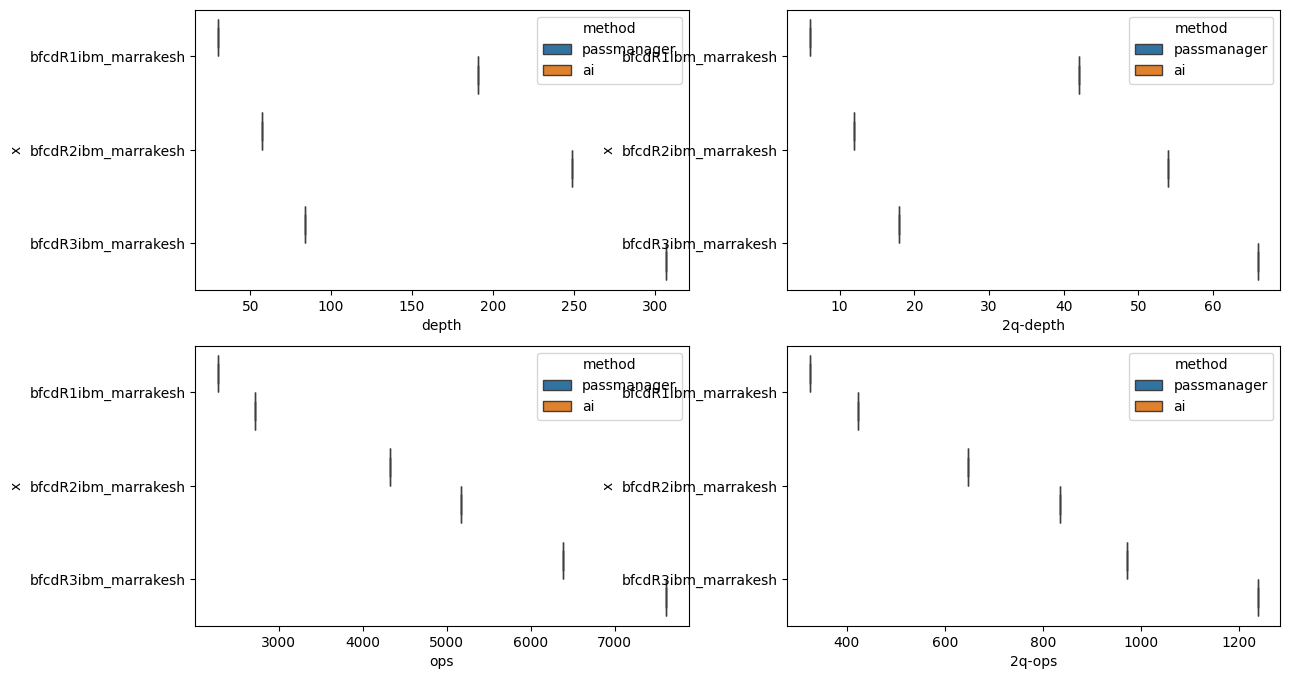

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


df_passmanager['method'] = 'passmanager'
df_ai['method'] = 'ai'

df = pd.concat([df_passmanager, df_ai])
df['x']=df['ansatz'] + df['reps'].apply(str) + df['device']
df['ops'] = df.count_ops.apply(lambda x: sum(x.values()))
df['2q-ops'] = df.count_ops.apply(lambda x: sum(v for k,v in x.items() if k in ['cz', 'ecr']))

_, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,8))
sns.boxplot(df[['x','depth','method']], y='x', x='depth', hue='method', ax=ax1)
# ax1.set_title('depth')
sns.boxplot(df[['x','2q-depth','method']], y='x', x='2q-depth', hue='method', ax=ax2)
# ax2.set_title('2q-depth')
sns.boxplot(df[['x','ops','method']], y='x', x='ops', hue='method', ax=ax3)
# ax3.set_title('ops')
sns.boxplot(df[['x','2q-ops','method']], y='x', x='2q-ops', hue='method', ax=ax4)
# ax4.set_title('2q-ops')

In [9]:
from qiskit_aer.primitives import SamplerV2
import numpy as np
import time

outputs = []
for device in ['ibm_marrakesh']:
    backend = get_backend(device, instance, num_vars)
    for ansatz in ['bfcdR']:
        for reps in [1,2]:
            for entanglement in ['bilinear', 'color']:
                ansatz_params = {'entanglement': entanglement, 'reps':reps}
                ansatz_, _ = build_ansatz(ansatz, ansatz_params, num_vars, backend)

                start_t = time.time()
                SamplerV2(options={'backend_options':{'method' : 'matrix_product_state', 'n_qubits': num_vars}}).\
                    run([(ansatz_, np.random.uniform(size=ansatz_.num_parameters))], shots=1)
                print(f'{ansatz} {reps} {entanglement} {time.time()-start_t}')

bfcdR 1 bilinear 0.006214141845703125
bfcdR 1 color 0.0011820793151855469
bfcdR 2 bilinear 0.002502918243408203
bfcdR 2 color 0.0010802745819091797


: 

: 

In [ ]:
bfcd > 70min for 1 shot! on MPS